In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [120]:
df = pd.read_csv('./data/india_housing_prices.csv')

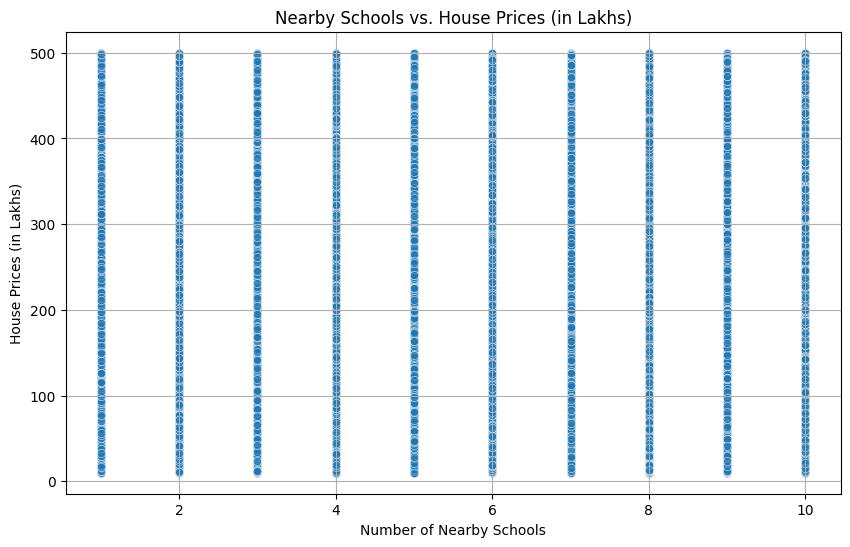

In [121]:
# 데이터 전처리: 결측값 제거
housing_data_cleaned = df.dropna(subset=['Price_in_Lakhs', 'Nearby_Schools'])

# 산점도 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data_cleaned, x='Nearby_Schools', y='Price_in_Lakhs', alpha=0.7)
plt.title('Nearby Schools vs. House Prices (in Lakhs)')
plt.xlabel('Number of Nearby Schools')
plt.ylabel('House Prices (in Lakhs)')
plt.grid(True)
plt.show()

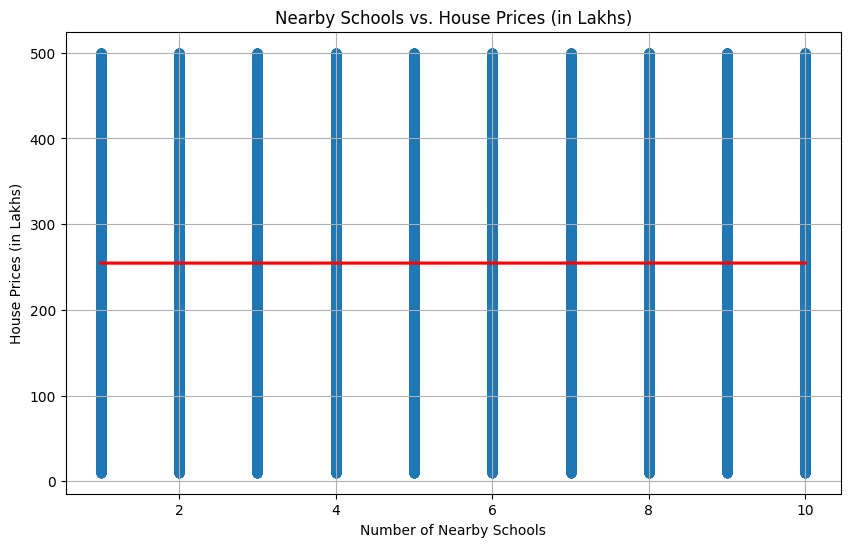

In [122]:

# 카테고리 열 정의
categories = ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status',
              'Public_Transport_Accessibility', 'Parking_Space', 'Security',
              'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

# 라벨 인코딩 함수 정의
def encode_feature(df):
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
    return df

# 데이터 불러오기
file_path = './data/india_housing_prices.csv'
housing_data = pd.read_csv(file_path)

# 라벨 인코딩 적용
housing_data_encoded = encode_feature(housing_data)

# 데이터 전처리: 결측값 제거
housing_data_cleaned = housing_data_encoded.dropna(subset=['Price_in_Lakhs', 'Nearby_Schools'])

# 산점도와 선형 회귀선 생성
plt.figure(figsize=(10, 6))
sns.regplot(data=housing_data_cleaned, x='Nearby_Schools', y='Price_in_Lakhs', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Nearby Schools vs. House Prices (in Lakhs)')
plt.xlabel('Number of Nearby Schools')
plt.ylabel('House Prices (in Lakhs)')
plt.grid(True)
plt.show()


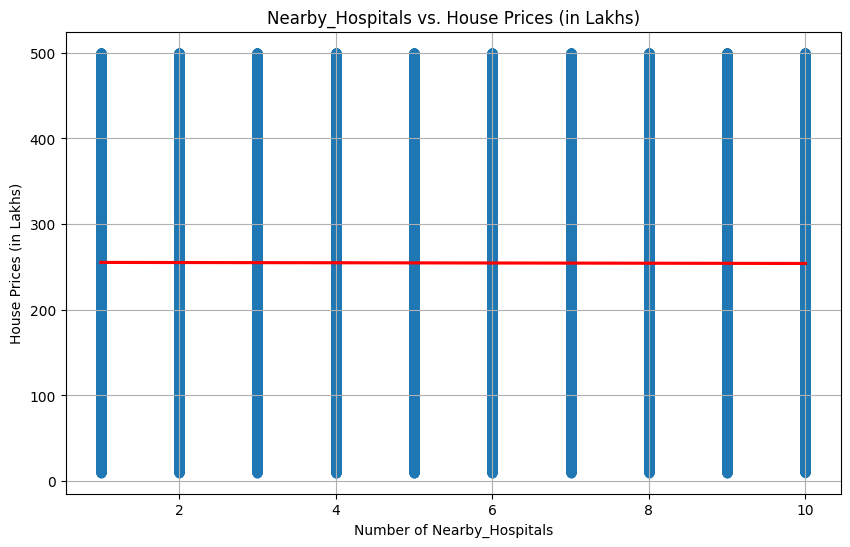

In [123]:
# 산점도와 선형 회귀선 생성
plt.figure(figsize=(10, 6))
sns.regplot(data=housing_data_cleaned, x='Nearby_Hospitals', y='Price_in_Lakhs', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Nearby_Hospitals vs. House Prices (in Lakhs)')
plt.xlabel('Number of Nearby_Hospitals')
plt.ylabel('House Prices (in Lakhs)')
plt.grid(True)
plt.show()


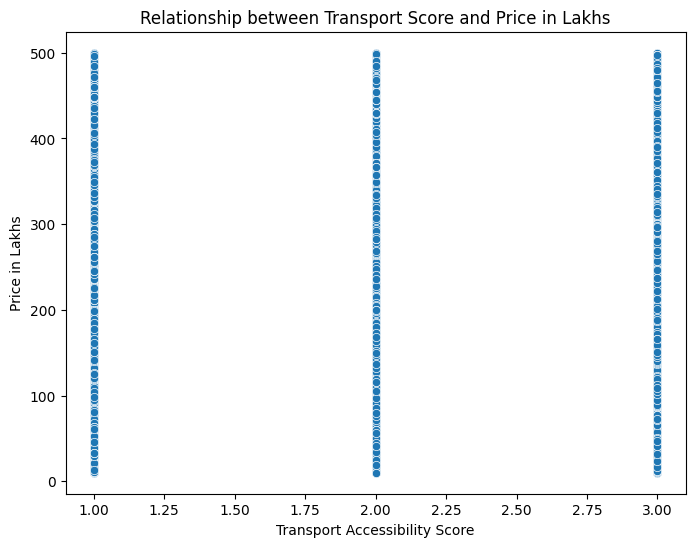

In [124]:
# Public_Transport_Accessibility 값을 점수로 변환
score_map = {'High': 3, 'Medium': 2, 'Low': 1}
df_1 = pd.DataFrame.copy(df)
df_1['Transport_Score'] = df_1['Public_Transport_Accessibility'].map(score_map)

# 가격과 점수 간의 관계를 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Transport_Score', y='Price_in_Lakhs', data=df_1)
plt.title('Relationship between Transport Score and Price in Lakhs')
plt.xlabel('Transport Accessibility Score')
plt.ylabel('Price in Lakhs')
plt.show()

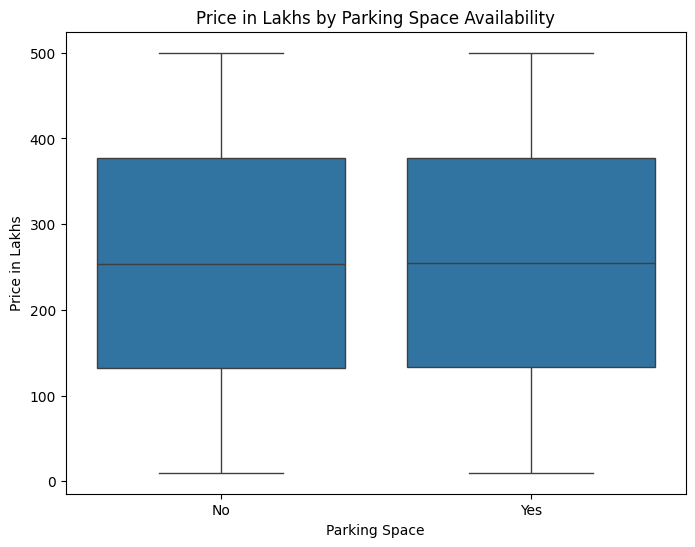

In [125]:
# Parking_Space의 여부에 따른 Price_in_Lakhs 값 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parking_Space', y='Price_in_Lakhs', data=df_1)
plt.title('Price in Lakhs by Parking Space Availability')
plt.xlabel('Parking Space')
plt.ylabel('Price in Lakhs')
plt.show()

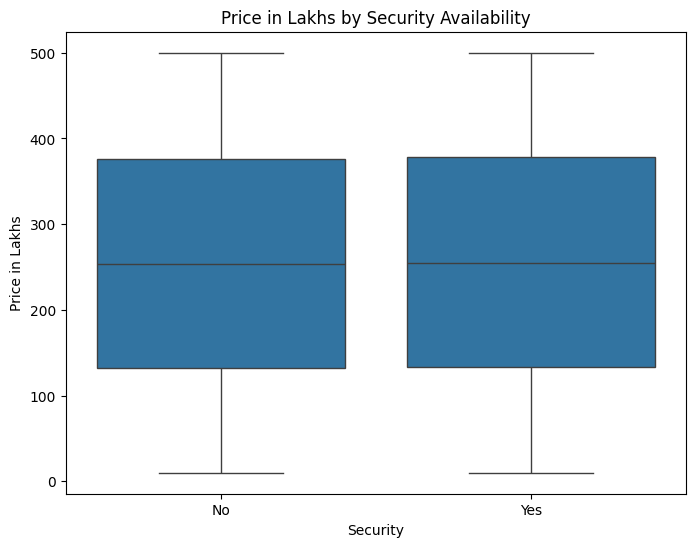

In [126]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Security', y='Price_in_Lakhs', data=df_1)
plt.title('Price in Lakhs by Security Availability')
plt.xlabel('Security')
plt.ylabel('Price in Lakhs')
plt.show()

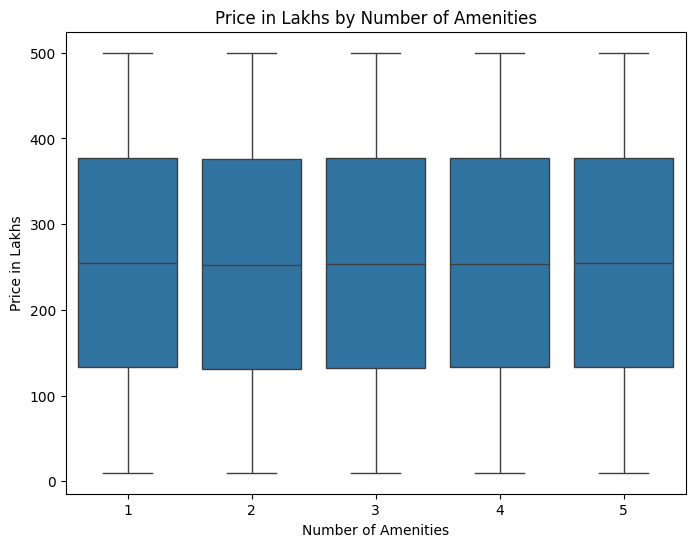

In [127]:
df_1['Amenities_Count'] = df_1['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Amenities 항목 개수에 따른 Price_in_Lakhs 값 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amenities_Count', y='Price_in_Lakhs', data=df_1)
plt.title('Price in Lakhs by Number of Amenities')
plt.xlabel('Number of Amenities')
plt.ylabel('Price in Lakhs')
plt.show()

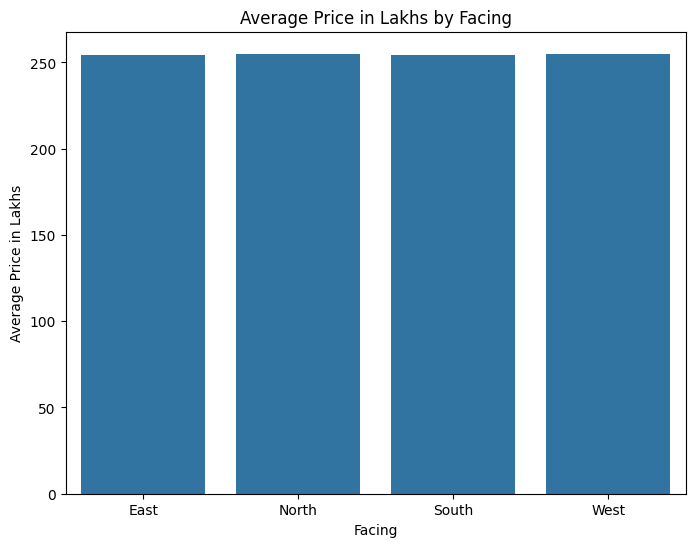

In [128]:
facing_price_avg = df_1.groupby('Facing')['Price_in_Lakhs'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Facing', y='Price_in_Lakhs', data=facing_price_avg)
plt.title('Average Price in Lakhs by Facing')
plt.xlabel('Facing')
plt.ylabel('Average Price in Lakhs')
plt.show()

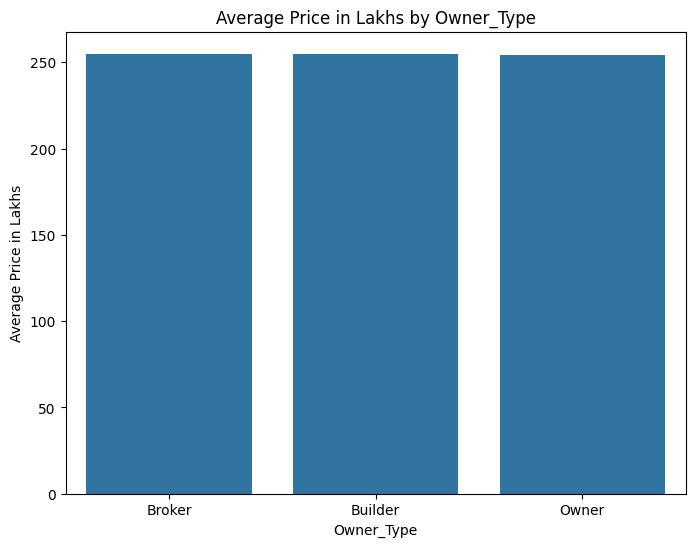

In [129]:
# Owner_Type 값에 따른 Price_in_Lakhs 평균 계산
Owner_Type_price_avg = df_1.groupby('Owner_Type')['Price_in_Lakhs'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Owner_Type', y='Price_in_Lakhs', data=Owner_Type_price_avg)
plt.title('Average Price in Lakhs by Owner_Type')
plt.xlabel('Owner_Type')
plt.ylabel('Average Price in Lakhs')
plt.show()

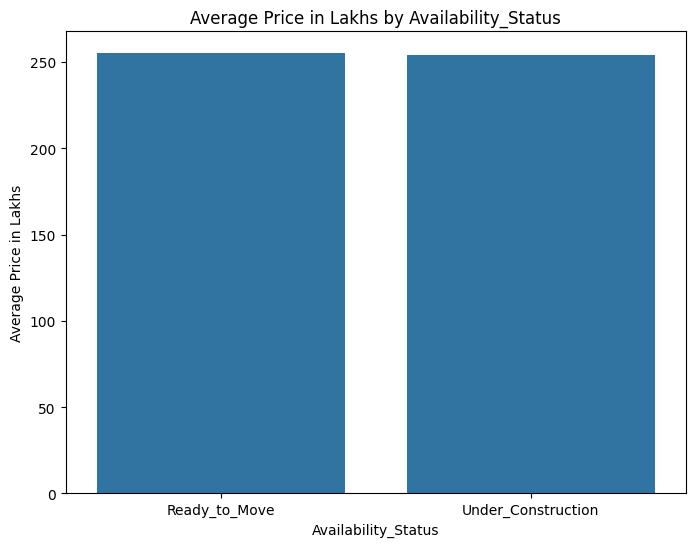

In [130]:
# Owner_Type 값에 따른 Price_in_Lakhs 평균 계산
Availability_Status_price_avg = df_1.groupby('Availability_Status')['Price_in_Lakhs'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Availability_Status', y='Price_in_Lakhs', data=Availability_Status_price_avg)
plt.title('Average Price in Lakhs by Availability_Status')
plt.xlabel('Availability_Status')
plt.ylabel('Average Price in Lakhs')
plt.show()

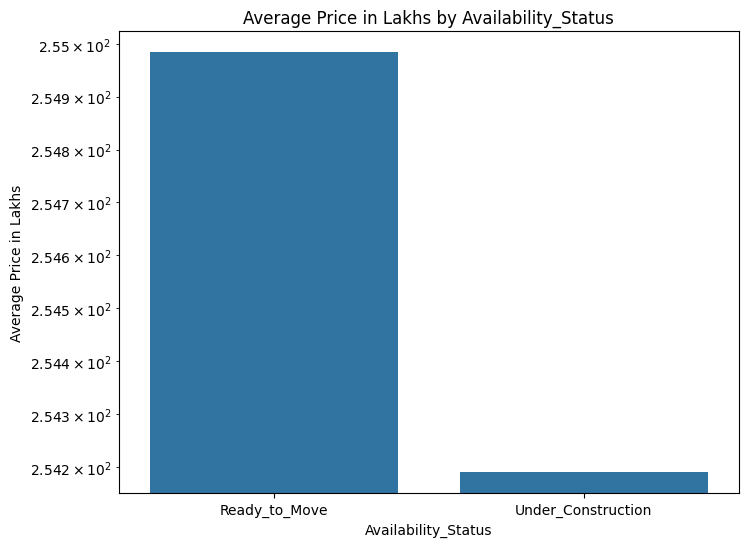

In [131]:
# Owner_Type 값에 따른 Price_in_Lakhs 평균 계산
Availability_Status_price_avg = df_1.groupby('Availability_Status')['Price_in_Lakhs'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Availability_Status', y='Price_in_Lakhs', data=Availability_Status_price_avg)
plt.title('Average Price in Lakhs by Availability_Status')
plt.xlabel('Availability_Status')
plt.ylabel('Average Price in Lakhs')

# y축을 로그 스케일로 설정
plt.yscale('log')

plt.show()


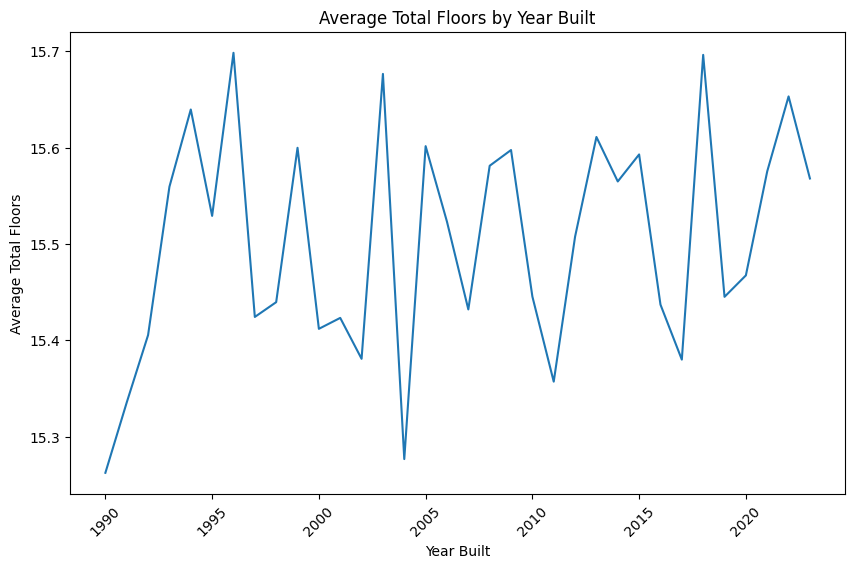

In [132]:
# Year_Built에 따른 Total_Floors 평균 계산
year_built_floors_avg = df_1.groupby('Year_Built')['Total_Floors'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year_Built', y='Total_Floors', data=year_built_floors_avg)
plt.title('Average Total Floors by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Total Floors')
plt.xticks(rotation=45)
plt.show()

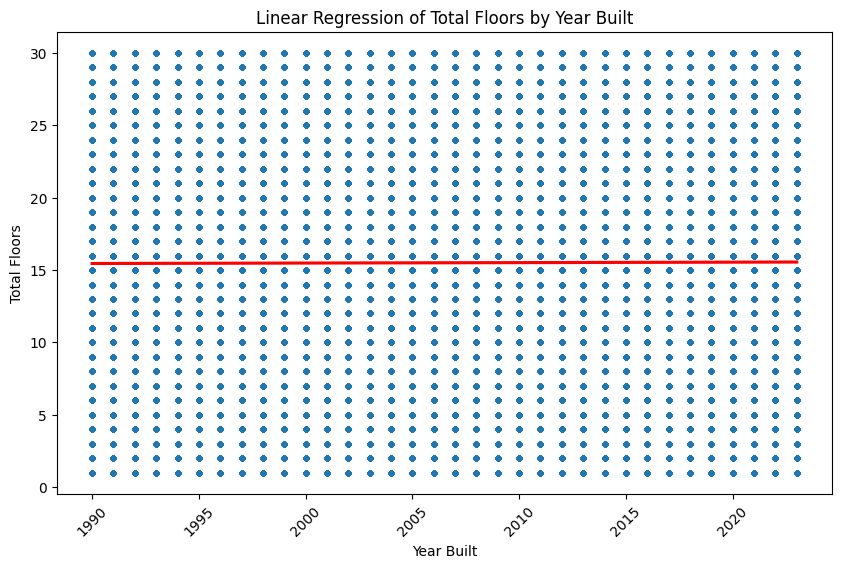

In [133]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Year_Built', y='Total_Floors', data=df_1, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Linear Regression of Total Floors by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Total Floors')
plt.xticks(rotation=45)
plt.show()

In [134]:
# 주별/도시별 평균 집값 구하기
state_avg = df.groupby("State")["Price_in_Lakhs"].mean()
print(state_avg)

city_avg = df.groupby("City")["Price_in_Lakhs"].mean()
print(city_avg)




State
Andhra Pradesh    255.197870
Assam             252.779235
Bihar             254.919040
Chhattisgarh      252.676337
Delhi             252.529900
Gujarat           255.790061
Haryana           254.445784
Jharkhand         253.610145
Karnataka         257.408465
Kerala            254.367332
Madhya Pradesh    255.961459
Maharashtra       254.706280
Odisha            252.838743
Punjab            252.796877
Rajasthan         254.600214
Tamil Nadu        256.663684
Telangana         255.535173
Uttar Pradesh     256.249920
Uttarakhand       254.677234
West Bengal       254.008640
Name: Price_in_Lakhs, dtype: float64
City
Ahmedabad         253.586827
Amritsar          252.429802
Bangalore         258.456639
Bhopal            256.498896
Bhubaneswar       254.902173
Bilaspur          251.879267
Chennai           256.830172
Coimbatore        256.504745
Cuttack           250.786672
Dehradun          256.890115
Durgapur          254.100152
Dwarka            253.454299
Faridabad         254.86

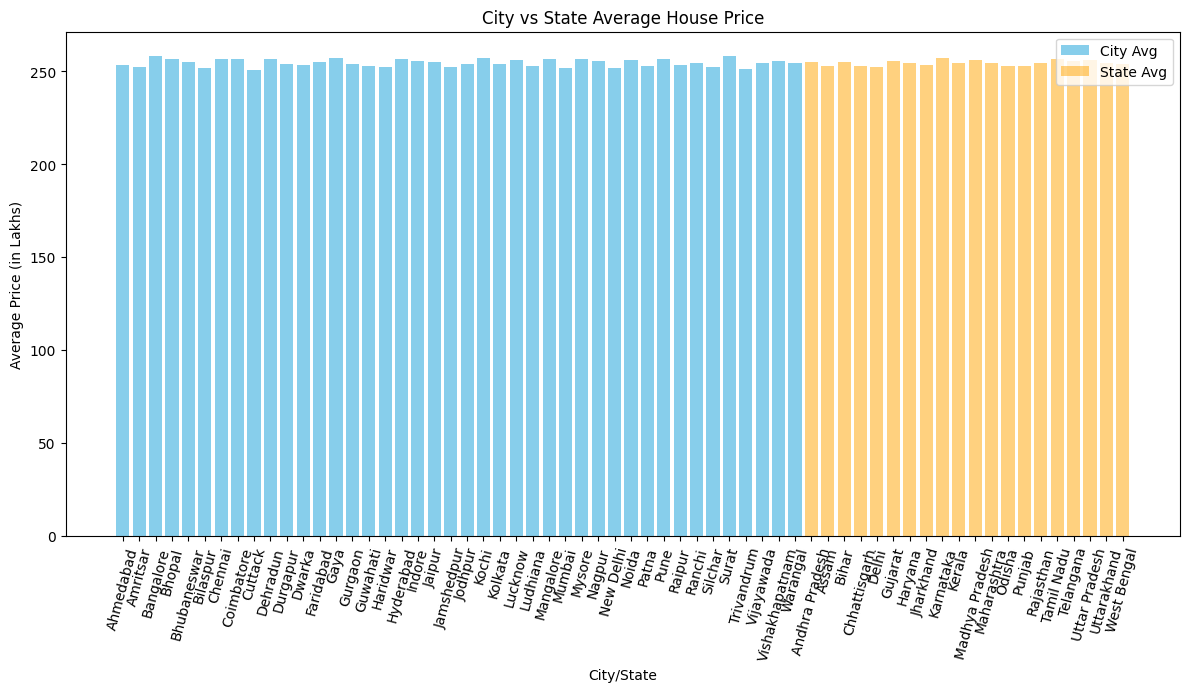

In [135]:
## 도시/주 별 평균 집값 시각화

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 도시별 평균 집값 스택형 막대 그래프
plt.bar(city_avg.index, city_avg, label='City Avg', color='skyblue')

# 주별 평균 집값 스택형 막대 그래프 (덧붙여서 표시)
plt.bar(state_avg.index, state_avg, label='State Avg', color='orange', alpha=0.5)

# 제목과 축 레이블 설정
plt.title("City vs State Average House Price")
plt.xlabel("City/State")
plt.ylabel("Average Price (in Lakhs)")

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()

# x축 도시/주 명 안겹치게
plt.xticks(rotation=75)

# 그래프 표시
plt.show()


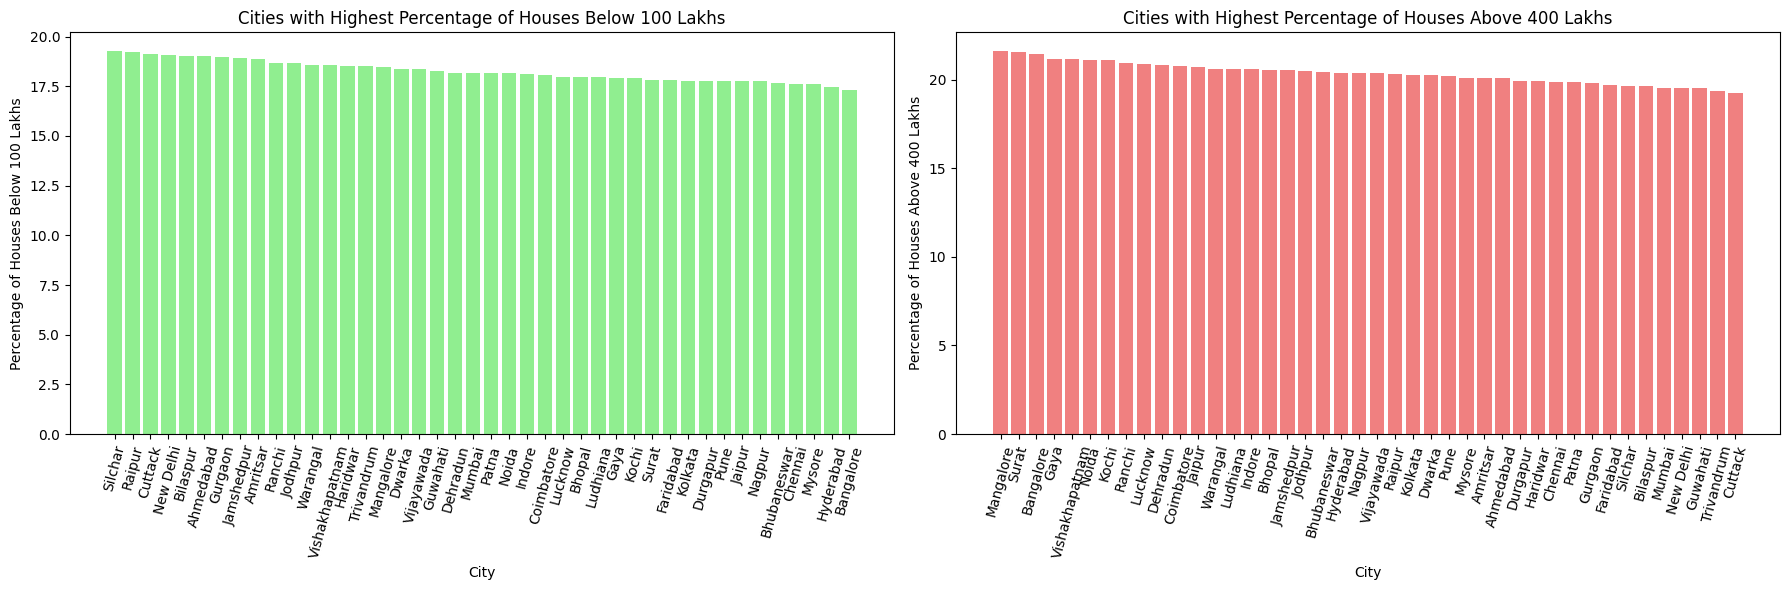

In [136]:
## 100이하 주택 비율이 높은 도시와 400이상 주택 비율이 낮은 도시 비교

# 집값이 100 이하인 데이터를 필터링하고 비율 계산
low_price_df = df[df["Price_in_Lakhs"] <= 100]
city_low_price_count = low_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_low_price_ratio = city_low_price_count / city_total_count * 100

# 100 이하 주택 비율을 기준으로 하위 5개 도시 선택
top_5_cities_with_low_price_ratio = city_low_price_ratio.sort_values(ascending=False)

# 집값이 400 이상인 데이터를 필터링하고 비율 계산
high_price_df = df[df["Price_in_Lakhs"] >= 400]
city_high_price_count = high_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_high_price_ratio = city_high_price_count / city_total_count * 100

# 400 이상 주택 비율
top_5_cities_with_high_price_ratio = city_high_price_ratio.sort_values(ascending=False)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: 100 이하 주택 비율
axes[0].bar(top_5_cities_with_low_price_ratio.index, top_5_cities_with_low_price_ratio.values, color='lightgreen')
axes[0].set_title("Cities with Highest Percentage of Houses Below 100 Lakhs")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Percentage of Houses Below 100 Lakhs")
axes[0].tick_params(axis='x', rotation=75)

# 두 번째 그래프: 400 이상 주택 비율
axes[1].bar(top_5_cities_with_high_price_ratio.index, top_5_cities_with_high_price_ratio.values, color='lightcoral')
axes[1].set_title("Cities with Highest Percentage of Houses Above 400 Lakhs")
axes[1].set_xlabel("City")
axes[1].set_ylabel("Percentage of Houses Above 400 Lakhs")
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

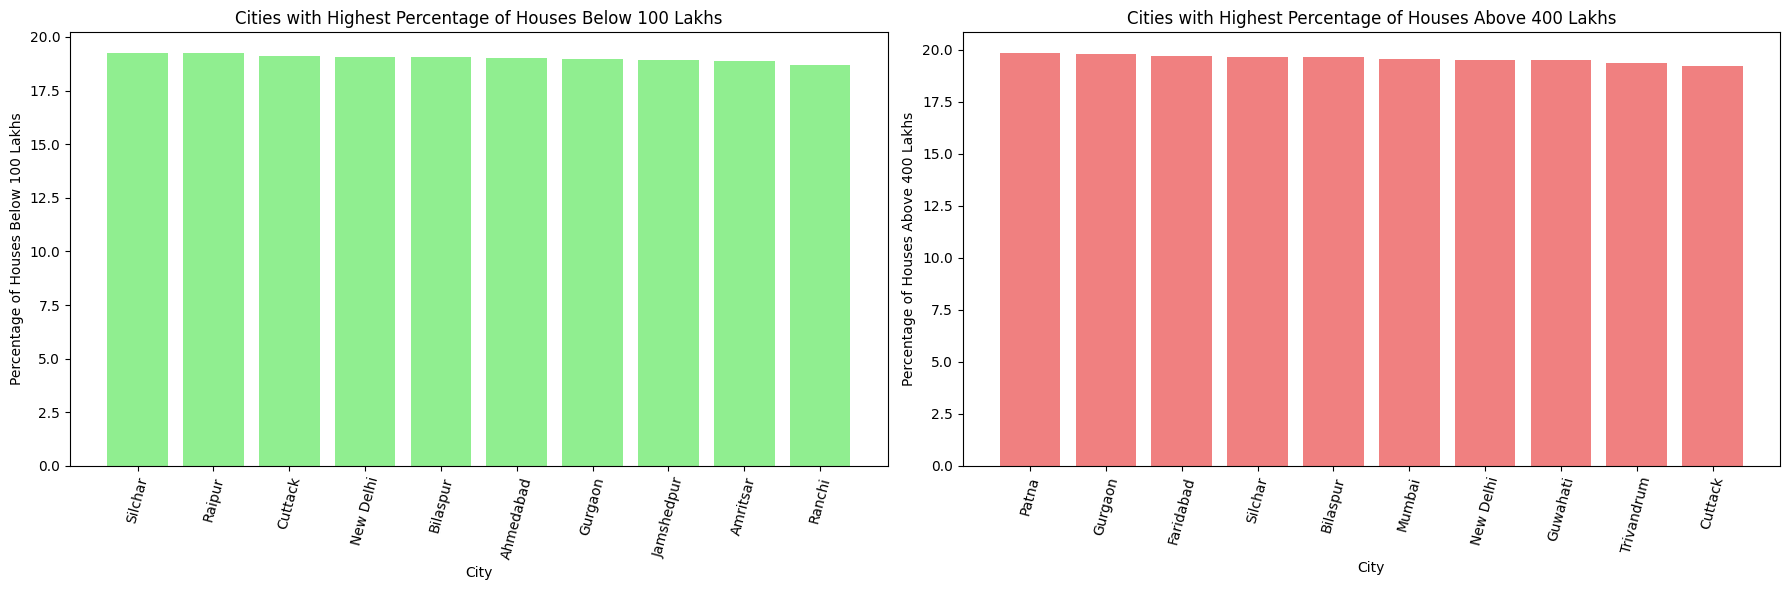

In [137]:
## 100이하 주택 비율이 높은 도시와 400이상 주택 비율이 낮은 도시를 비교 -> 10개 도시 중 5개의 도시가 일치함

# 집값이 100 이하인 데이터를 필터링하고 비율 계산
low_price_df = df[df["Price_in_Lakhs"] <= 100]
city_low_price_count = low_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_low_price_ratio = city_low_price_count / city_total_count * 100

# 100 이하 주택 비율을 기준으로 하위 5개 도시 선택
top_5_cities_with_low_price_ratio = city_low_price_ratio.sort_values(ascending=False).head(10)

# 집값이 400 이상인 데이터를 필터링하고 비율 계산
high_price_df = df[df["Price_in_Lakhs"] >= 400]
city_high_price_count = high_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_high_price_ratio = city_high_price_count / city_total_count * 100

# 400 이상 주택 비율
top_5_cities_with_high_price_ratio = city_high_price_ratio.sort_values(ascending=False).tail(10)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: 100 이하 주택 비율
axes[0].bar(top_5_cities_with_low_price_ratio.index, top_5_cities_with_low_price_ratio.values, color='lightgreen')
axes[0].set_title("Cities with Highest Percentage of Houses Below 100 Lakhs")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Percentage of Houses Below 100 Lakhs")
axes[0].tick_params(axis='x', rotation=75)

# 두 번째 그래프: 400 이상 주택 비율
axes[1].bar(top_5_cities_with_high_price_ratio.index, top_5_cities_with_high_price_ratio.values, color='lightcoral')
axes[1].set_title("Cities with Highest Percentage of Houses Above 400 Lakhs")
axes[1].set_xlabel("City")
axes[1].set_ylabel("Percentage of Houses Above 400 Lakhs")
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()


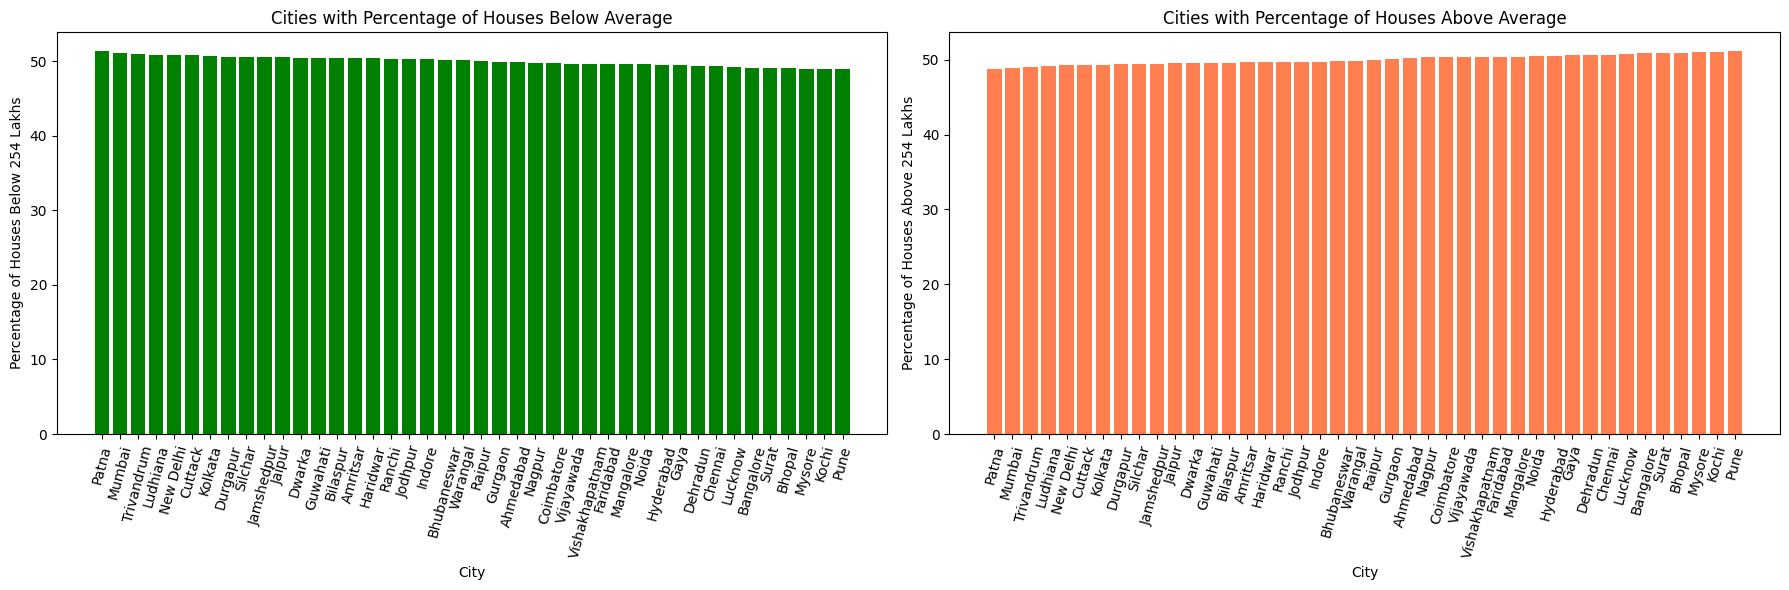

In [138]:
## 평균값을 기준으로 도시별 집값 나누어 비율 계산해보기 -> 254미만의 비율이 높은 도시와 254이상 비율이 낮은 도시가 순서가 같음

# 집값이 254 미만인 데이터를 필터링하고 비율 계산
low_price_df = df[df["Price_in_Lakhs"] < 254]
city_low_price_count = low_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_low_price_ratio = city_low_price_count / city_total_count * 100

# 254 미만 주택 비율을 기준으로 하위 5개 도시 선택
top_5_cities_with_low_price_ratio = city_low_price_ratio.sort_values(ascending=False)

# 집값이 254 이상인 데이터를 필터링하고 비율 계산
high_price_df = df[df["Price_in_Lakhs"] >= 254]
city_high_price_count = high_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_high_price_ratio = city_high_price_count / city_total_count * 100
top_5_cities_with_high_price_ratio = city_high_price_ratio.sort_values(ascending=True)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: 254 미만 주택 비율
axes[0].bar(top_5_cities_with_low_price_ratio.index, top_5_cities_with_low_price_ratio.values, color='green')
axes[0].set_title("Cities with Percentage of Houses Below Average")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Percentage of Houses Below 254 Lakhs")
axes[0].tick_params(axis='x', rotation=75)

# 두 번째 그래프: 254 이상 주택 비율
axes[1].bar(top_5_cities_with_high_price_ratio.index, top_5_cities_with_high_price_ratio.values, color='coral')
axes[1].set_title("Cities with Percentage of Houses Above Average")
axes[1].set_xlabel("City")
axes[1].set_ylabel("Percentage of Houses Above 254 Lakhs")
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()


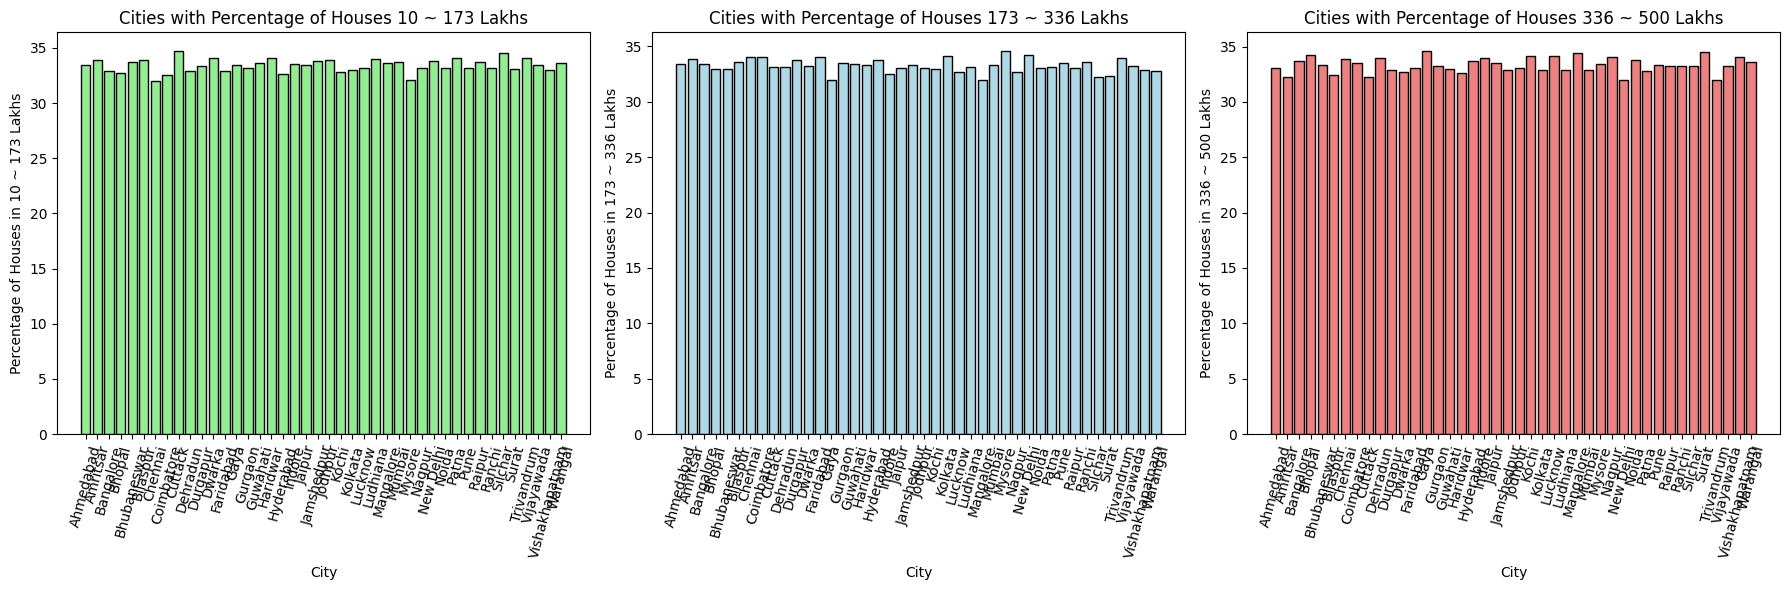

In [139]:
## 최소값과 최대값을 기준으로 3구간으로 나눈 도시별 가격

# 최소값과 최대값 설정
min_value = 10
max_value = 500

# 3개의 구간으로 나누기 (등간격 구간)
interval_1 = 173  # 첫 번째 구간의 끝
interval_2 = 336  # 두 번째 구간의 끝

# 구간을 기준으로 데이터를 나누기
low_price_df = df[(df["Price_in_Lakhs"] >= min_value) & (df["Price_in_Lakhs"] < interval_1)]
mid_price_df = df[(df["Price_in_Lakhs"] >= interval_1) & (df["Price_in_Lakhs"] < interval_2)]
high_price_df = df[(df["Price_in_Lakhs"] >= interval_2) & (df["Price_in_Lakhs"] <= max_value)]

# 각 구간별로 도시별 비율 계산
city_low_price_count = low_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_low_price_ratio = city_low_price_count / city_total_count * 100

city_mid_price_count = mid_price_df.groupby("City").size()
city_mid_price_ratio = city_mid_price_count / city_total_count * 100

city_high_price_count = high_price_df.groupby("City").size()
city_high_price_ratio = city_high_price_count / city_total_count * 100

low_price_df = low_price_df.sort_values(by="Price_in_Lakhs", ascending=False)
mid_price_df = mid_price_df.sort_values(by="Price_in_Lakhs", ascending=False)
high_price_df = high_price_df.sort_values(by="Price_in_Lakhs", ascending=False)

# 그래프 출력
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 첫 번째 그래프: 10 ~ 173 구간
axes[0].bar(city_low_price_ratio.index, city_low_price_ratio.values, color='lightgreen', edgecolor='black')
axes[0].set_title("Cities with Percentage of Houses 10 ~ 173 Lakhs")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Percentage of Houses in 10 ~ 173 Lakhs")
axes[0].tick_params(axis='x', rotation=75)

# 두 번째 그래프: 173 ~ 336 구간
axes[1].bar(city_mid_price_ratio.index, city_mid_price_ratio.values, color='lightblue', edgecolor='black')
axes[1].set_title("Cities with Percentage of Houses 173 ~ 336 Lakhs")
axes[1].set_xlabel("City")
axes[1].set_ylabel("Percentage of Houses in 173 ~ 336 Lakhs")
axes[1].tick_params(axis='x', rotation=75)

# 세 번째 그래프: 336 ~ 500 구간
axes[2].bar(city_high_price_ratio.index, city_high_price_ratio.values, color='lightcoral', edgecolor='black')
axes[2].set_title("Cities with Percentage of Houses 336 ~ 500 Lakhs")
axes[2].set_xlabel("City")
axes[2].set_ylabel("Percentage of Houses in 336 ~ 500 Lakhs")
axes[2].tick_params(axis='x', rotation=75)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_164\796665706.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Range', y='Price_in_Lakhs', data=df_2, palette='Set2', ax=axes[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_164\796665706.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2[df_2['Price_Range'] == '10-173 Lakhs']["Price_in_Lakhs"], shade=True, color="lightgreen", label="10-173 Lakhs", ax=axes[1])
C:\Users\USER\AppData\Local\Temp\ipykernel_164\796665706.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2[df_2['Price_Range'] == '173-336 Lakhs']["Price_in_La

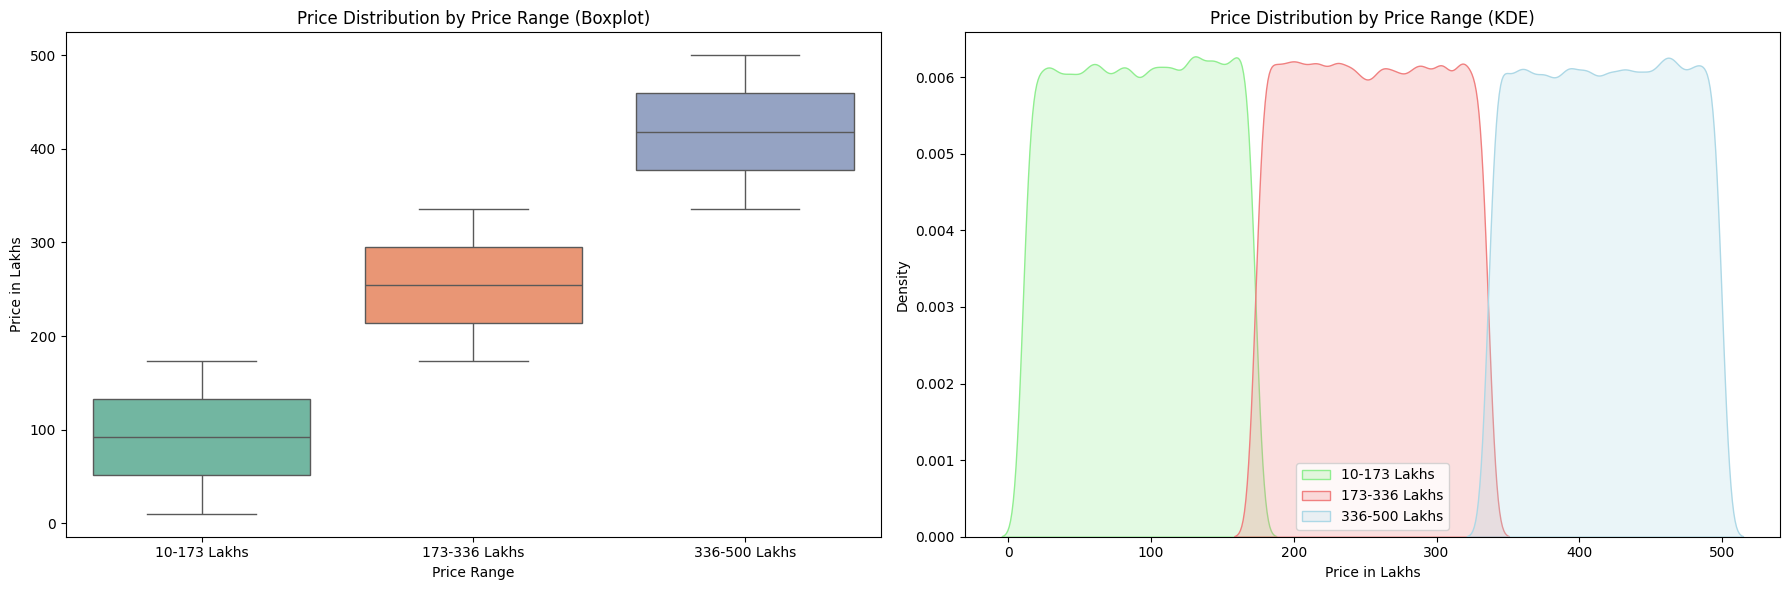

In [140]:
# 가격대 구간을 하나의 변수로 합치기
df_2 = pd.DataFrame.copy(df)
df_2['Price_Range'] = pd.cut(df_2['Price_in_Lakhs'], bins=[10, 173, 336, 500], labels=['10-173 Lakhs', '173-336 Lakhs', '336-500 Lakhs'])

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 박스플롯 (가격 분포)
sns.boxplot(x='Price_Range', y='Price_in_Lakhs', data=df_2, palette='Set2', ax=axes[0])
axes[0].set_title('Price Distribution by Price Range (Boxplot)')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Price in Lakhs')

# 커널 밀도 추정 (가격 분포)
sns.kdeplot(data=df_2[df_2['Price_Range'] == '10-173 Lakhs']["Price_in_Lakhs"], shade=True, color="lightgreen", label="10-173 Lakhs", ax=axes[1])
sns.kdeplot(data=df_2[df_2['Price_Range'] == '173-336 Lakhs']["Price_in_Lakhs"], shade=True, color="lightcoral", label="173-336 Lakhs", ax=axes[1])
sns.kdeplot(data=df_2[df_2['Price_Range'] == '336-500 Lakhs']["Price_in_Lakhs"], shade=True, color="lightblue", label="336-500 Lakhs", ax=axes[1])

axes[1].set_title('Price Distribution by Price Range (KDE)')
axes[1].set_xlabel('Price in Lakhs')
axes[1].set_ylabel('Density')
axes[1].legend()

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


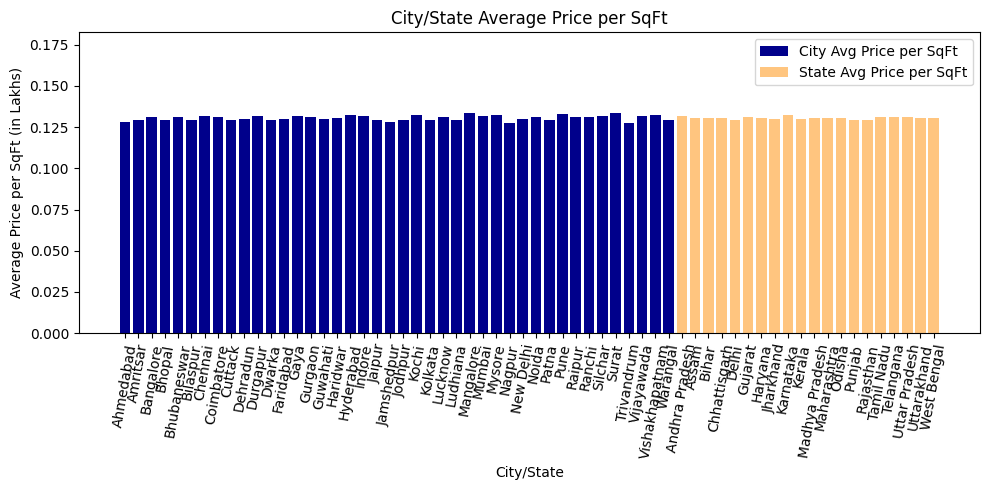

In [141]:
# 도시별 평당 가격 계산
city_avg_price_per_sqft = df_2.groupby('City')['Price_per_SqFt'].mean()

# 주별 평당 가격 계산
state_avg_price_per_sqft = df_2.groupby('State')['Price_per_SqFt'].mean()

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 도시별 평균 평당 가격 스택형 막대 그래프
plt.bar(city_avg_price_per_sqft.index, city_avg_price_per_sqft, label='City Avg Price per SqFt', color='darkblue')

# 주별 평균 평당 가격 스택형 막대 그래프 (덧붙여서 표시)
plt.bar(state_avg_price_per_sqft.index, state_avg_price_per_sqft, label='State Avg Price per SqFt', color='darkorange', alpha=0.5)

# 그래프 제목과 축 레이블 설정
plt.title("City/State Average Price per SqFt")
plt.xlabel("City/State")
plt.ylabel("Average Price per SqFt (in Lakhs)")

# y축 범위 조정 (필요시 삭제 가능)
plt.ylim(0, max(city_avg_price_per_sqft.max(), state_avg_price_per_sqft.max()+0.05))

# 범례 추가
plt.legend()

# x축 레이블 회전 및 레이아웃 조정
plt.xticks(rotation=80)
plt.tight_layout()

# 그래프 표시
plt.show()


In [142]:
# 라벨 인코더
categories = ['State','City','Locality','Property_Type','Furnished_Status',\
              'Public_Transport_Accessibility','Parking_Space','Security',\
                'Amenities','Facing','Owner_Type','Availability_Status']
def encode_feature(df):
    for cate_item in categories:
        df_label = df
        label_encoder = LabelEncoder()
        df_label[cate_item] = label_encoder.fit_transform(df_label[cate_item])
    return df_label
df_label = encode_feature(df)

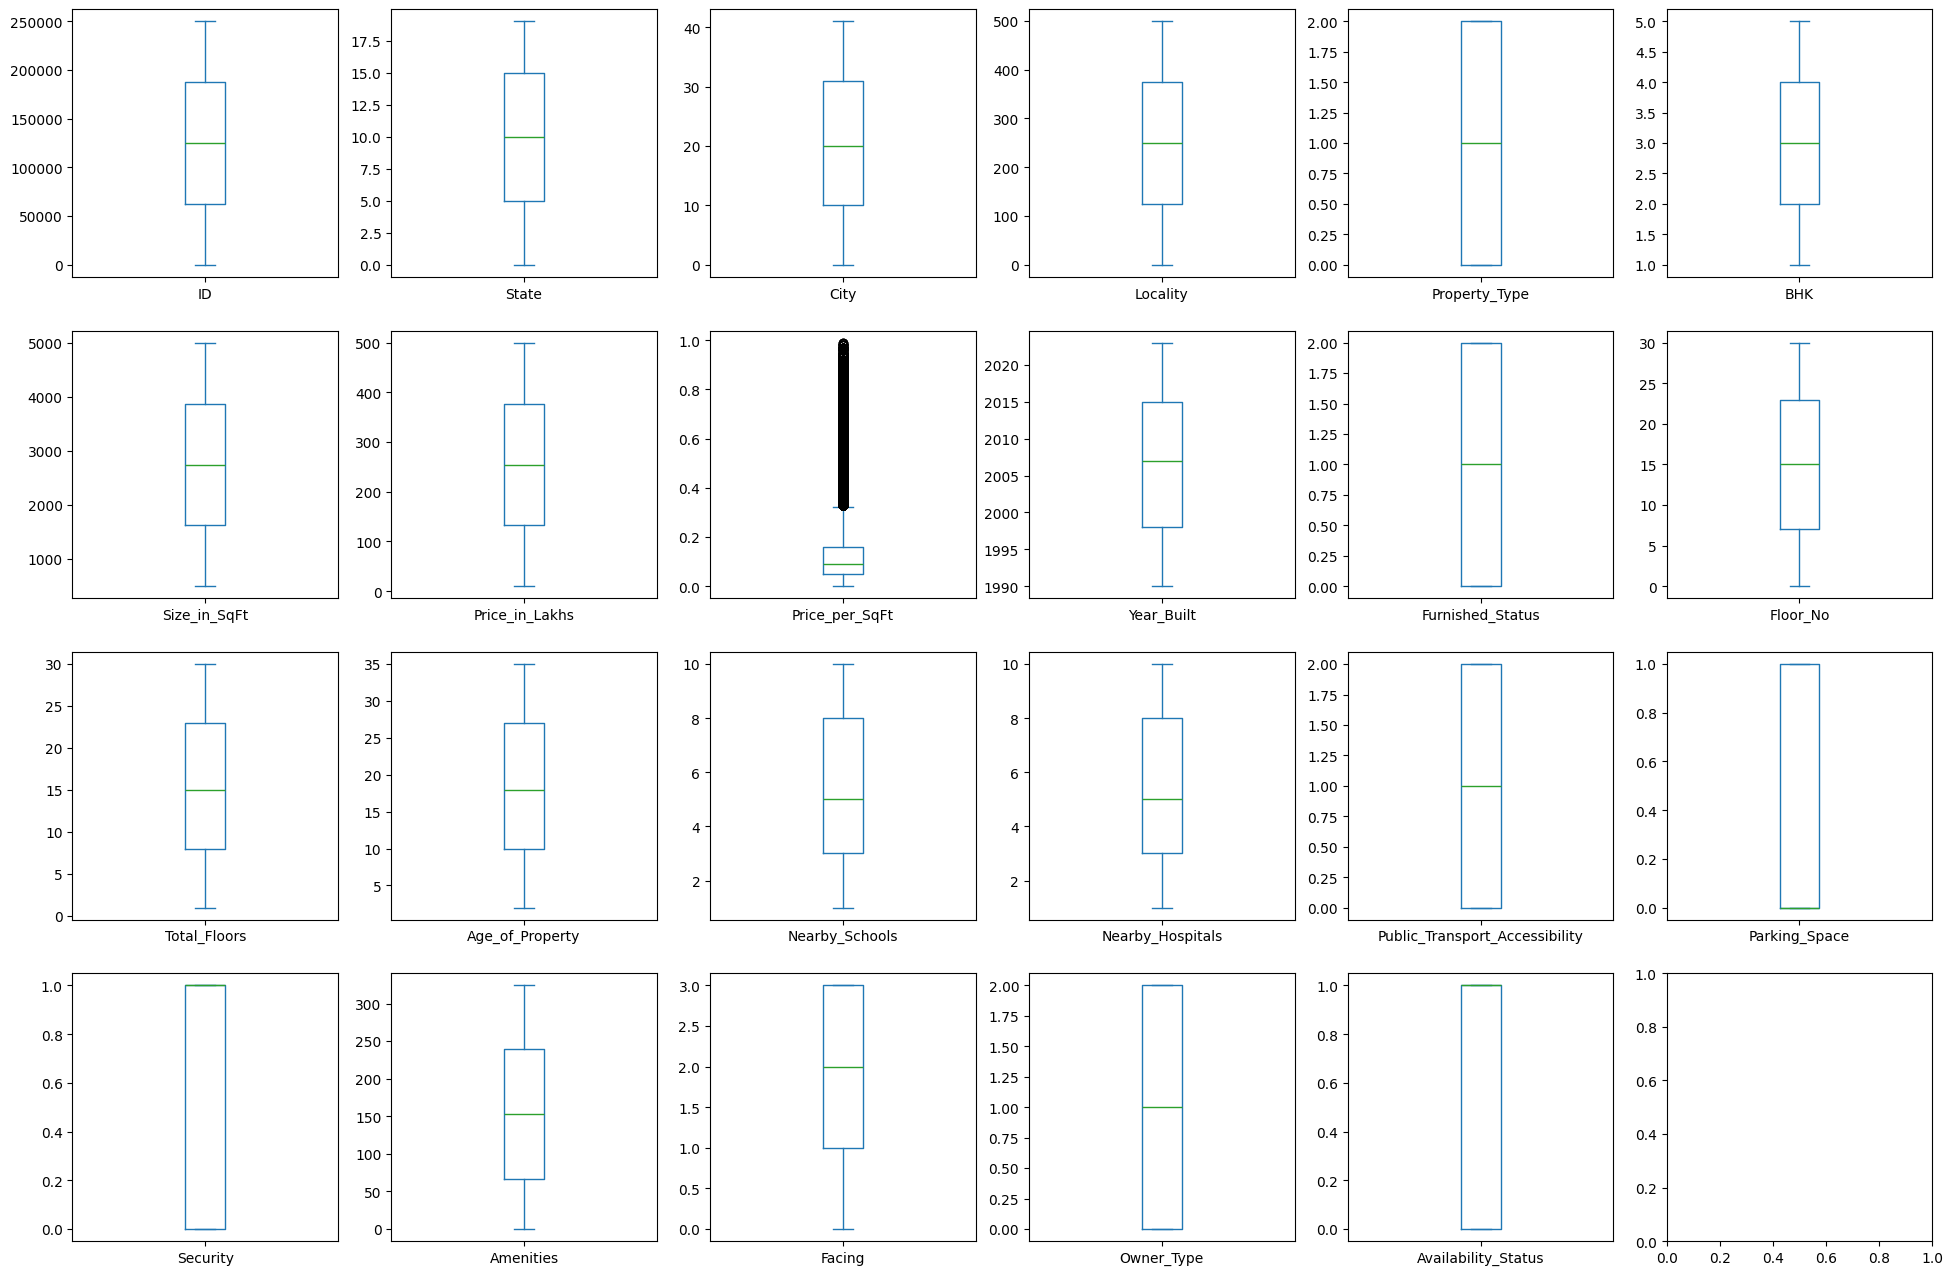

In [143]:
# 이상치 탐색
fig, ax = plt.subplots(figsize=(24,16),ncols=6,nrows=4)

columns = df_label.columns

for i, col_name in enumerate(columns):
    row = i // 6
    col = i % 6
    ax_temp = ax[row][col]

    df_label[col_name].plot(kind='box',ax=ax_temp)


<Axes: >

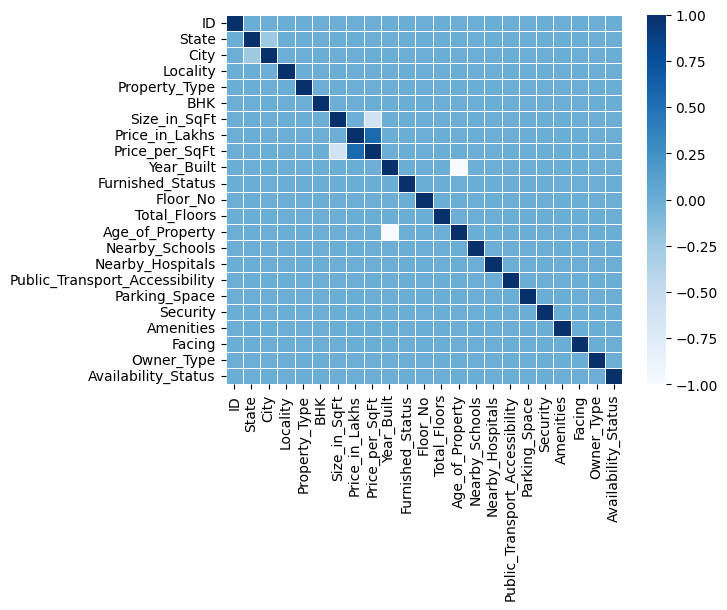

In [144]:
# heatmap
sns.heatmap(data = df_label.corr(numeric_only=True),  fmt = '.2f', linewidths=.5, cmap='Blues')

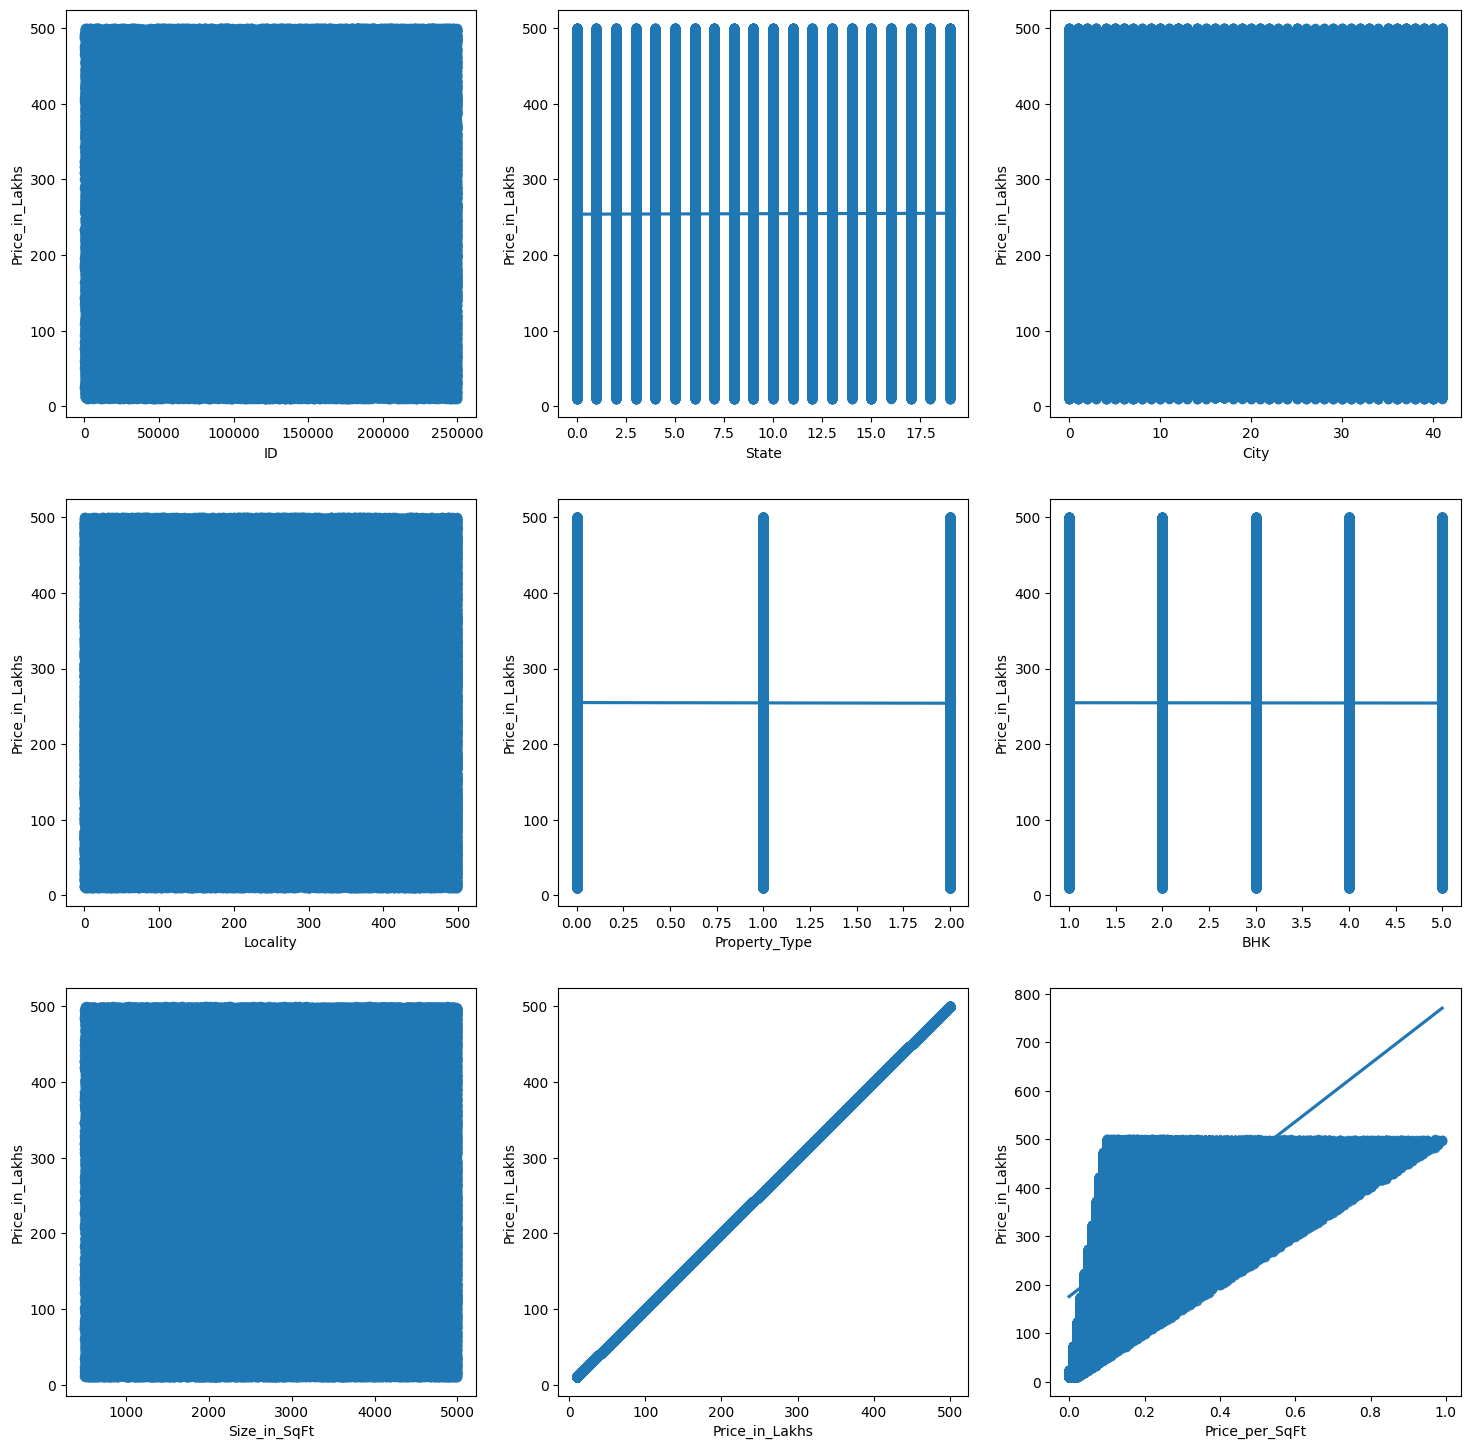

In [145]:
# regplot
fig, ax = plt.subplots(figsize=(18,18),ncols=3,nrows=3)

columns = df_label.columns[:9]

for i, col_name in enumerate(columns):
    row = i // 3
    col = i % 3
    ax_temp = ax[row][col]

    sns.regplot(data=df, x=col_name, y='Price_in_Lakhs', ax=ax_temp)

2023 Property_Type
0    2521
1    2554
2    2493
Name: ID, dtype: int64


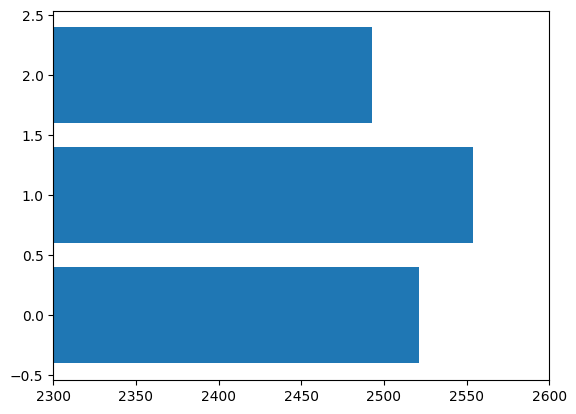

In [146]:
# 연도별 건축 종류 수
# 경향성 찾기 어려움
import matplotlib.pyplot as plt
from IPython import display
year_list = df['Year_Built'].unique()
year_list = np.sort(year_list)
for i in year_list:
    df_tmp = df[df['Year_Built'] == i]
    df_tmp_1 = df_tmp.groupby(['Property_Type'])['ID'].count()
    print(i, df_tmp_1)
    plt.xlim(2300, 2600)
    gragh = plt.barh(df_tmp_1.index.values, df_tmp_1.values)  
    plt.show()  
    plt.pause(0.2)
    # plt.cla()
    display.clear_output(wait=True)

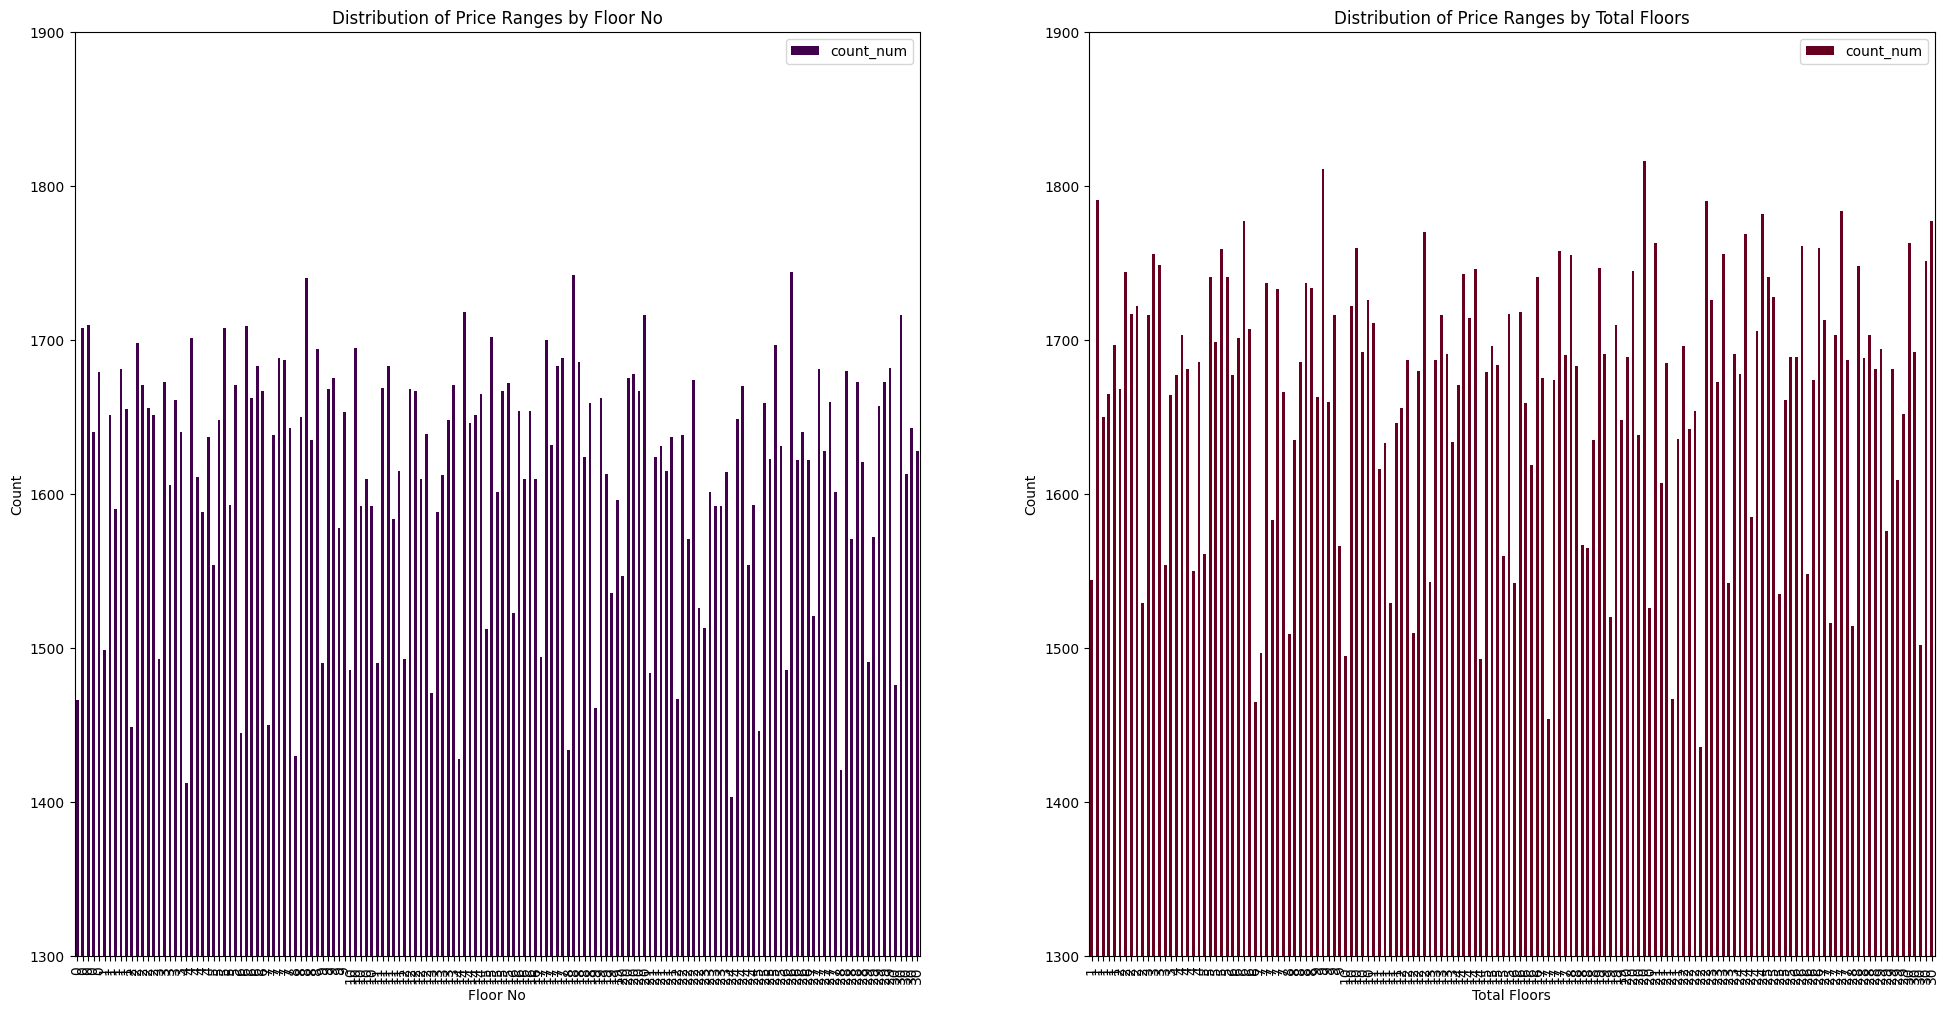

In [147]:
# floor 변수들 확인
fig, ax = plt.subplots(figsize=(24,12),ncols=2,nrows=1)
# 필요한 열 선택 및 전처리
graph_df = df[['Floor_No','Total_Floors', 'Price_in_Lakhs']].assign(
    Total_Floors=lambda x: x['Total_Floors'].astype(str),
    Price_in_Lakhs=lambda x: x['Price_in_Lakhs'].apply(
        lambda y: '400~500' if y >= 400 else '300~400' if y >= 300 else '200~300' if y >= 200 else '100~200' if y >= 100 else '0~100'
    )
)

# 그룹화 및 데이터 재구성
graph_df_2 = (graph_df.groupby(['Floor_No', 'Price_in_Lakhs'])
              .size()
              .reset_index(name='count_num')
              .assign(Floor_No=lambda x: x['Floor_No'].astype(int))
              .sort_values('Floor_No'))
graph_df_3 = (graph_df.groupby(['Total_Floors', 'Price_in_Lakhs'])
              .size()
              .reset_index(name='count_num')
              .assign(Total_Floors=lambda x: x['Total_Floors'].astype(int))
              .sort_values('Total_Floors'))

# 시각화
my_colors = [(0.5,0.4), (0.75,0.25)]*31
graph_1 = graph_df_2.plot(
    kind='bar',
    x='Floor_No',
    y='count_num',
    title='Distribution of Price Ranges by Floor No',
    xlabel='Floor No',
    ylabel='Count',
    ax=ax[0],
    colormap='PRGn'
)

graph_2 = graph_df_3.plot(
    kind='bar',
    x='Total_Floors',
    y='count_num',
    title='Distribution of Price Ranges by Total Floors',
    xlabel='Total Floors',
    ylabel='Count',
    ax=ax[1],
    colormap='RdGy'
)
# graph_1.set_xticklabels(rotation=45)
# graph_2.set_xticklabels(rotation=45)
graph_1.set_ylim(1300,1900)
graph_2.set_ylim(1300,1900)
plt.show()

# 결과 확인
# graph_df_2
